In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib as py

from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline



import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
df_2017 = pd.read_csv("2017.csv")

In [3]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
df_2016 = pd.read_csv("2016.csv")

In [5]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
df_2015 = pd.read_csv("2015.csv")

In [7]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
#WE WILL DIVIDE THE WORK INTO THESE THREE DATASETS, WORK THROUGH IT, AND COMPARE AFTERWARDS

In [9]:
df_2015['Country'].size

158

In [10]:
df_2017['Country'].size

155

In [11]:
df_2016['Country'].size

157

In [12]:
#MADE A CLASS COLUMN IN CASE WE WANT TO USE IT FOR FUTURE PREDICTION BASED ON OUR IMPORTANT FEATURES

average_happiness_score_overall = ((df_2017['Happiness.Score']).sum() + (df_2016['Happiness Score']).sum()+(df_2015['Happiness Score']).sum())/(len(df_2017.index)+len(df_2015.index)+len(df_2016.index))
                                    
average_happiness_score_overall

df_2017['Global Average Above or Below'] = np.zeros(len(df_2017.index))
df_2017.head()
for i in range(len(df_2017.index)):
    if df_2017.at[i, 'Happiness.Score'] >= average_happiness_score_overall:
        df_2017.at[i,'Global Average Above or Below'] = 1.0




In [13]:
#df_2017.Region.value_counts()

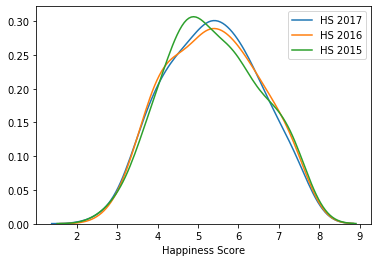

In [14]:
#THIS SHOWS THE DISTRIBUTION OF THE HAPPINESS SCORE FROM '15 TO '17

sns.distplot(df_2017['Happiness.Score'], hist=False, label = "HS 2017")
sns.distplot(df_2016['Happiness Score'], hist=False,  label = "HS 2016")
sns.distplot(df_2015['Happiness Score'], hist=False,  label = "HS 2015")

plt.savefig("distribution.png")

In [15]:
#this adds the region column to 2017 dataset as well        

df_2016_region = df_2016['Region']
df_2017["Region"] = np.nan
region_2017 = []
index = 0
for i in df_2017['Country']:
    counter = 0
    for j in df_2016['Country']:
        if i == j:
            df_2017.loc[index,"Region"] = (df_2016_region[counter])
        counter+=1
    index+=1
len(region_2017)
df_2017[df_2017['Region'].isnull()].index.tolist()
#[32, 70, 112, 138, 154]


df_2017.loc[154,"Region"] = "Sub-Saharan Africa"
df_2017.loc[138,"Region"] = "Sub-Saharan Africa"
df_2017.loc[112,"Region"] = "Sub-Saharan Africa"
df_2017.loc[70,"Region"] = "Eastern Asia"
df_2017.loc[32,"Region"] = "Eastern Asia"


df_2017.Region.value_counts()


Sub-Saharan Africa                 39
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

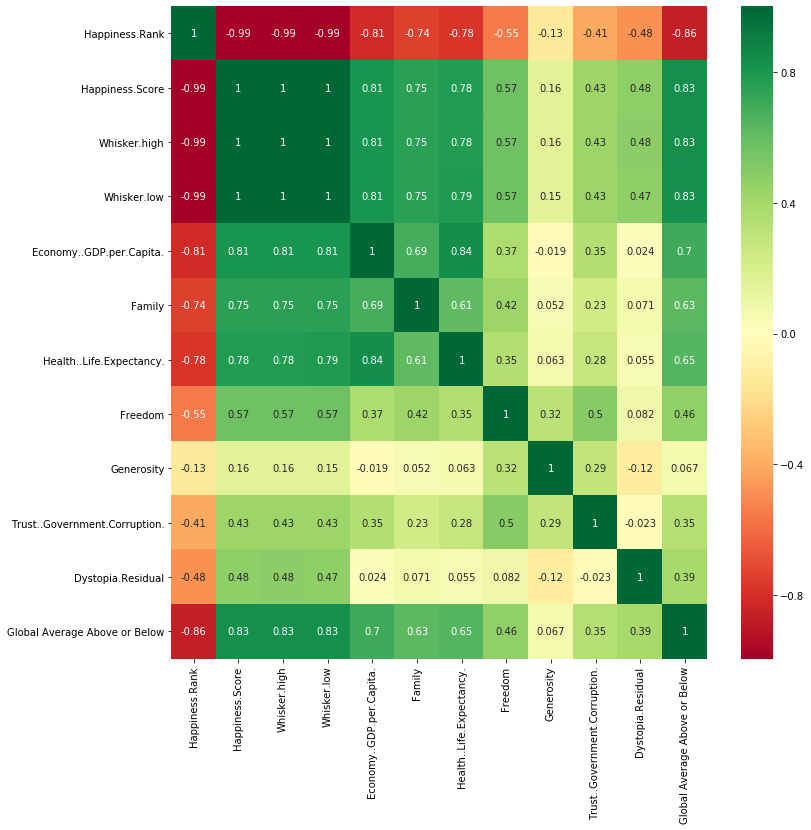

In [16]:
#A CORRELATION MATRIX FOR 2017
corrmat = df_2017.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (12,12))
g = sns.heatmap(df_2017[top_corr_features].corr(), annot=True, cmap = "RdYlGn")
plt.savefig("2017_corrmap.png",bbox_inches = 'tight')

In [17]:
#WE ONLY LOOK AT THE CORRELATION VALUES WITH HAPPINESS SCORE THAT ARE ABOVE 0.5 FOR 2017

In [18]:
#A CORRELATION MATRIX FOR 2017
cor_target = abs(corrmat["Happiness.Score"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness.Rank                   0.992774
Happiness.Score                  1.000000
Whisker.high                     0.999497
Whisker.low                      0.999520
Economy..GDP.per.Capita.         0.812469
Family                           0.752737
Health..Life.Expectancy.         0.781951
Freedom                          0.570137
Global Average Above or Below    0.829664
Name: Happiness.Score, dtype: float64

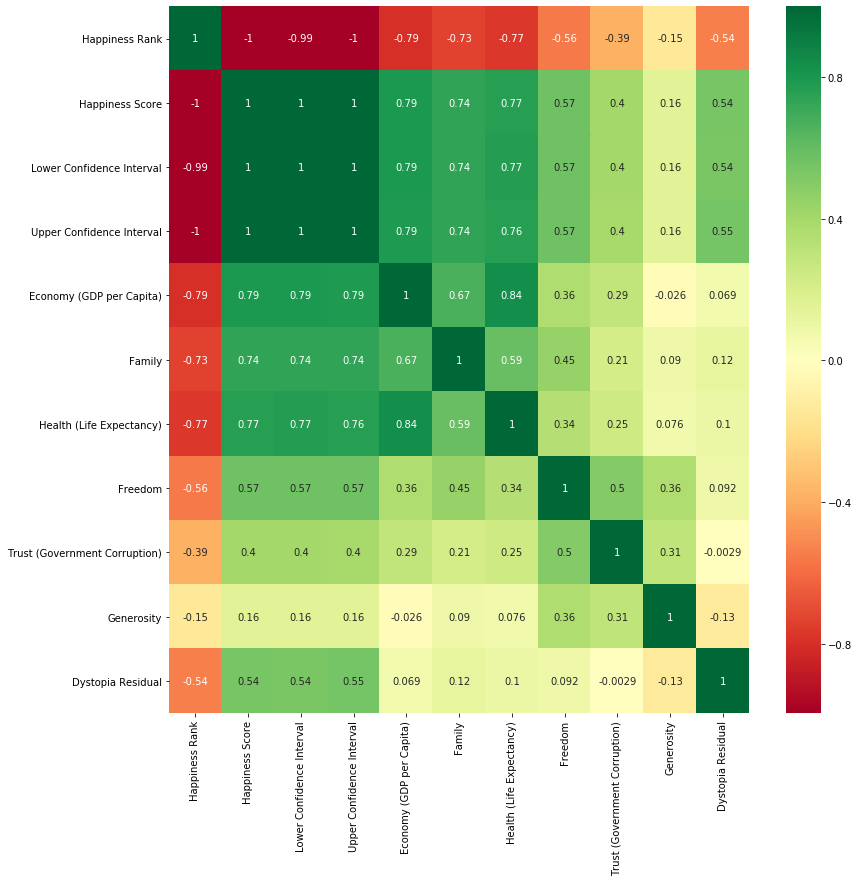

In [19]:

corrmat = df_2016.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (13,13))
g = sns.heatmap(df_2016[top_corr_features].corr(), annot=True, cmap = "RdYlGn")
plt.savefig("2016_corrmap.png",bbox_inches = 'tight')

In [20]:
#WE ONLY LOOK AT THE CORRELATION VALUES WITH HAPPINESS SCORE THAT ARE ABOVE 0.5 FOR 2016
cor_target = abs(corrmat["Happiness Score"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank               0.995743
Happiness Score              1.000000
Lower Confidence Interval    0.999485
Upper Confidence Interval    0.999474
Economy (GDP per Capita)     0.790322
Family                       0.739252
Health (Life Expectancy)     0.765384
Freedom                      0.566827
Dystopia Residual            0.543738
Name: Happiness Score, dtype: float64

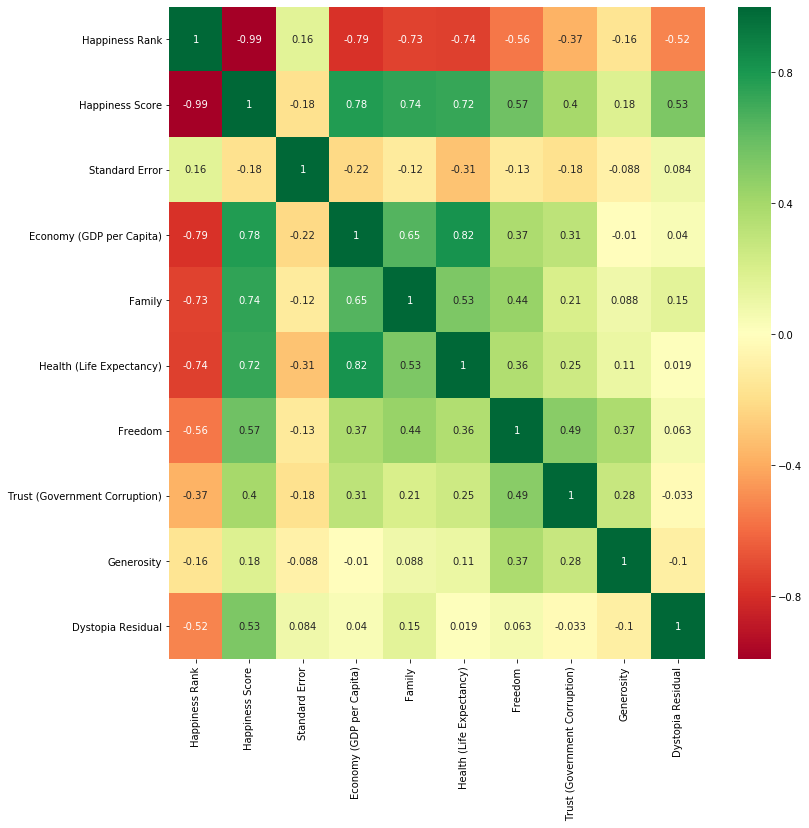

In [21]:
#A CORRELATION MATRIX FOR 2015
corrmat = df_2015.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (12,12))
g = sns.heatmap(df_2015[top_corr_features].corr(), annot=True, cmap = "RdYlGn")
plt.savefig("2015_corrmap.png",bbox_inches = 'tight')

In [22]:
#WE ONLY LOOK AT THE CORRELATION VALUES WITH HAPPINESS SCORE THAT ARE ABOVE 0.5 FOR 2015

In [23]:
cor_target = abs(corrmat["Happiness Score"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank              0.992105
Happiness Score             1.000000
Economy (GDP per Capita)    0.780966
Family                      0.740605
Health (Life Expectancy)    0.724200
Freedom                     0.568211
Dystopia Residual           0.530474
Name: Happiness Score, dtype: float64

In [24]:
#CHECKING THE REGION BASED ON THE COUNTRIES IN 2016
df_region_details = df_2016.Region.value_counts()

#percentage of each region participating



In [25]:
#WE ONLY LOOK AT THE CORRELATION VALUES WITH HAPPINESS SCORE THAT ARE ABOVE 0.5 FOR 2016
df_2015.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

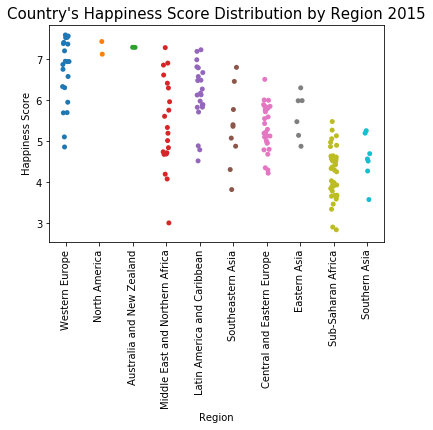

In [26]:
#HAPPINESS SCORE ACCORDING TO REGION IN 2015
x = sns.stripplot(x = "Region", y = "Happiness Score", data = df_2015, jitter = True)
plt.xticks(rotation = 90)
plt.title("Country's Happiness Score Distribution by Region 2015", color = 'black', fontsize = 15)
plt.savefig("stripplot_2015_HappinessScore.png",bbox_inches = 'tight')

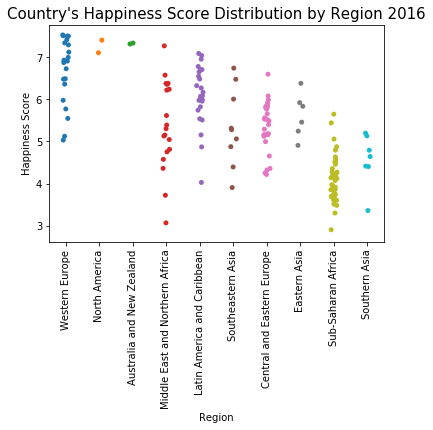

In [27]:
#HAPPINESS SCORE ACCORDING TO REGION IN 2016
x = sns.stripplot(x = "Region", y = "Happiness Score", data = df_2016, jitter = True)
plt.xticks(rotation = 90)
plt.title("Country's Happiness Score Distribution by Region 2016", color = 'black', fontsize = 15)

plt.savefig("stripplot_2016_HappinessScore.png",bbox_inches = 'tight')

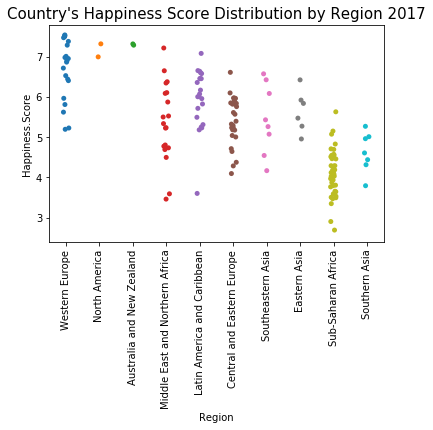

In [28]:
#HAPPINESS SCORE ACCORDING TO REGION IN 2016
x = sns.stripplot(x = "Region", y = "Happiness.Score", data = df_2017, jitter = True)
plt.xticks(rotation = 90)
plt.title("Country's Happiness Score Distribution by Region 2017", color = 'black', fontsize = 15)

plt.savefig("stripplot_2017_HappinessScore.png",bbox_inches = 'tight')

In [29]:
#THIS MAY BE SOMEWHAT REDUNDANT BASED ON THE THINGS IVE DONE AFTERWARDS, BUT NEVERTHELESS, IT CONTAINS
#MEANS OF HAPPINESS SCORE BASED ON REGIONS FOR 2015 AND 16
df2015_means={}
df2015_means['Western Europe']=df_2015.loc[df_2015['Region'] == 'Western Europe'].mean()["Happiness Score"]
df2015_means['North America']=df_2015.loc[df_2015['Region'] == 'North America'].mean()["Happiness Score"]
df2015_means['Australia and New Zealand']=df_2015.loc[df_2015['Region'] == 'Australia and New Zealand'].mean()["Happiness Score"]
df2015_means['Middle East and Northern Africa']=df_2015.loc[df_2015['Region'] == 'Middle East and Northern Africa'].mean()["Happiness Score"]
df2015_means['Latin America and Caribbean']=df_2015.loc[df_2015['Region'] == 'Latin America and Caribbean'].mean()["Happiness Score"]
df2015_means['Southeastern Asia']=df_2015.loc[df_2015['Region'] == 'Southeastern Asia'].mean()["Happiness Score"]
df2015_means['Central and Eastern Europe']=df_2015.loc[df_2015['Region'] == 'Central and Eastern Europe'].mean()["Happiness Score"]
df2015_means['Eastern Asia']=df_2015.loc[df_2015['Region'] == 'Eastern Asia'].mean()["Happiness Score"]
df2015_means['Sub-Saharan Africa']=df_2015.loc[df_2015['Region'] == 'Sub-Saharan Africa'].mean()["Happiness Score"]
df2015_means['Southern Asia']=df_2015.loc[df_2015['Region'] == 'Southern Asia'].mean()["Happiness Score"]


df2016_means={}
df2016_means['Western Europe']=df_2016.loc[df_2016['Region'] == 'Western Europe'].mean()["Happiness Score"]
df2016_means['North America']=df_2016.loc[df_2016['Region'] == 'North America'].mean()["Happiness Score"]
df2016_means['Australia and New Zealand']=df_2016.loc[df_2016['Region'] == 'Australia and New Zealand'].mean()["Happiness Score"]
df2016_means['Middle East and Northern Africa']=df_2016.loc[df_2016['Region'] == 'Middle East and Northern Africa'].mean()["Happiness Score"]
df2016_means['Latin America and Caribbean']=df_2016.loc[df_2016['Region'] == 'Latin America and Caribbean'].mean()["Happiness Score"]
df2016_means['Southeastern Asia']=df_2016.loc[df_2016['Region'] == 'Southeastern Asia'].mean()["Happiness Score"]
df2016_means['Central and Eastern Europe']=df_2016.loc[df_2016['Region'] == 'Central and Eastern Europe'].mean()["Happiness Score"]
df2016_means['Eastern Asia']=df_2016.loc[df_2016['Region'] == 'Eastern Asia'].mean()["Happiness Score"]
df2016_means['Sub-Saharan Africa']=df_2016.loc[df_2016['Region'] == 'Sub-Saharan Africa'].mean()["Happiness Score"]
df2016_means['Southern Asia']=df_2016.loc[df_2016['Region'] == 'Southern Asia'].mean()["Happiness Score"]

df2017_means={}
df2017_means['Western Europe']=df_2017.loc[df_2017['Region'] == 'Western Europe'].mean()["Happiness.Score"]
df2017_means['North America']=df_2017.loc[df_2017['Region'] == 'North America'].mean()["Happiness.Score"]
df2017_means['Australia and New Zealand']=df_2017.loc[df_2017['Region'] == 'Australia and New Zealand'].mean()["Happiness.Score"]
df2017_means['Middle East and Northern Africa']=df_2017.loc[df_2017['Region'] == 'Middle East and Northern Africa'].mean()["Happiness.Score"]
df2017_means['Latin America and Caribbean']=df_2017.loc[df_2017['Region'] == 'Latin America and Caribbean'].mean()["Happiness.Score"]
df2017_means['Southeastern Asia']=df_2017.loc[df_2017['Region'] == 'Southeastern Asia'].mean()["Happiness.Score"]
df2017_means['Central and Eastern Europe']=df_2017.loc[df_2017['Region'] == 'Central and Eastern Europe'].mean()["Happiness.Score"]
df2017_means['Eastern Asia']=df_2017.loc[df_2017['Region'] == 'Eastern Asia'].mean()["Happiness.Score"]
df2017_means['Sub-Saharan Africa']=df_2017.loc[df_2017['Region'] == 'Sub-Saharan Africa'].mean()["Happiness.Score"]
df2017_means['Southern Asia']=df_2017.loc[df_2017['Region'] == 'Southern Asia'].mean()["Happiness.Score"]

In [30]:
listkey2015=[]
listval2015 = []
for key,value in df2015_means.items():
    listkey2015.append(key)
    listval2015.append(value)

listkey2015
listval2015

listkey2016=[]
listval2016 = []
for key,value in df2016_means.items():
    listkey2016.append(key)
    listval2016.append(value)

listkey2015
listval2016

listkey2017=[]
listval2017 = []
for key,value in df2017_means.items():
    listkey2017.append(key)
    listval2017.append(value)
    
listkey2017

['Western Europe',
 'North America',
 'Australia and New Zealand',
 'Middle East and Northern Africa',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Sub-Saharan Africa',
 'Southern Asia']

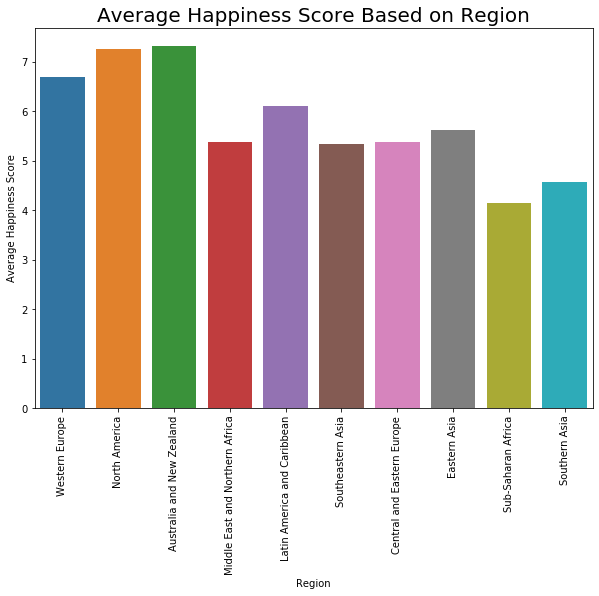

In [31]:
#VISUAL FOR THE DICTIONARY AND LISTS ABOVE

#dt2016 = data2016.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = listkey2016, y = listval2016)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score Based on Region', color = 'black', fontsize = 20)
plt.show()

In [32]:
newset = {'Region':listkey2015,'Mean Happiness Score 2015':listval2015, 'Mean Happiness Score 2016':listval2016, 'Mean Happiness Score 2017':listval2017}


In [33]:
df_new = pd.DataFrame(newset)


In [34]:
df_new

,Region,Mean Happiness Score 2015,Mean Happiness Score 2016,Mean Happiness Score 2017
0,Western Europe,6.689619,6.685667,6.703714
1,North America,7.273000,7.254000,7.154500
2,Australia and New Zealand,7.285000,7.323500,7.299000
3,Middle East and Northern Africa,5.406900,5.386053,5.369684
4,Latin America and Caribbean,6.144682,6.101750,5.957818
5,Southeastern Asia,5.317444,5.338889,5.444875
6,Central and Eastern Europe,5.332931,5.370690,5.409931
7,Eastern Asia,5.626167,5.624167,5.646667
8,Sub-Saharan Africa,4.202800,4.136421,4.111949
9,Southern Asia,4.580857,4.563286,4.628429


In [35]:
#SIDE BY SIDE COMPARISON FOR 2015 AND 2016

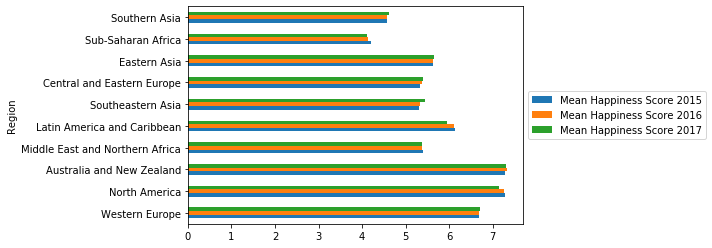

In [36]:
ax = df_new.plot.barh(x = "Region")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Happiness15_16_17.png",bbox_inches = 'tight')

In [37]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [38]:
#HEATMAP BASED ON GLOBAL HAPPINESS IN 2017

In [39]:
data = dict(type = 'choropleth', locations = df_2017['Country'],locationmode = 'country names',z = df_2017['Happiness.Score'],
           colorbar = {'title':'Happiness Scale'})
layout = dict(title = 'Global Happiness Scores 2017',width=2000, height=1000, geo = dict(showframe = False, projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

import os


choromap.write_image("images/fig1.png")

In [40]:
X = df_2017.drop(["Happiness.Score","Country","Happiness.Rank","Global Average Above or Below","Region"], axis=1)
y = df_2017['Global Average Above or Below']

In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.neural_network import MLPClassifier 
import sklearn.model_selection 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123) 

In [42]:
col = X.columns 

MLP = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter=500)


In [43]:
X.dtypes

Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [44]:
MLP.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
predictions = MLP.predict(X_test)

In [46]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10, random_state=2)

In [47]:
scoring = 'accuracy'
cv_results_MLP1 = model_selection.cross_val_score(MLP, X_train, y_train, cv=kfold,scoring = scoring )
print('average CV score with 10-folds for MLP1: ', cv_results_MLP1.mean())


average CV score with 10-folds for MLP1:  0.9506410256410256


In [48]:
X = df_2017[["Family","Health..Life.Expectancy.",'Economy..GDP.per.Capita.']]
y = df_2017['Global Average Above or Below']

In [49]:
X

,Family,Health..Life.Expectancy.,Economy..GDP.per.Capita.
0,1.533524,0.796667,1.616463
1,1.551122,0.792566,1.482383
2,1.610574,0.833552,1.480633
3,1.516912,0.858131,1.564980
4,1.540247,0.809158,1.443572
5,1.428939,0.810696,1.503945
6,1.481349,0.834558,1.479204
7,1.548195,0.816760,1.405706
8,1.478162,0.830875,1.494387
9,1.510042,0.843887,1.484415


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123) 
col = X.columns 

MLP = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter=500)
MLP.fit(X_train, y_train)
predictions = MLP.predict(X_test)
kfold = model_selection.KFold(n_splits = 10, random_state=2)
scoring = 'accuracy'
cv_results_MLP1 = model_selection.cross_val_score(MLP, X_train, y_train, cv=kfold,scoring = scoring )
print('average CV score with 10-folds for MLP1: ', cv_results_MLP1.mean())

average CV score with 10-folds for MLP1:  0.8538461538461538


In [51]:
X = df_2017.drop(["Family","Health..Life.Expectancy.",'Economy..GDP.per.Capita.', 'Country','Happiness.Rank','Happiness.Score','Whisker.high','Whisker.low','Global Average Above or Below','Region'],axis=1)
y = df_2017['Global Average Above or Below']

In [52]:
X

,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0.635423,0.362012,0.315964,2.277027
1,0.626007,0.355280,0.400770,2.313707
2,0.627163,0.475540,0.153527,2.322715
3,0.620071,0.290549,0.367007,2.276716
4,0.617951,0.245483,0.382612,2.430182
5,0.585384,0.470490,0.282662,2.294804
6,0.611101,0.435540,0.287372,2.187264
7,0.614062,0.500005,0.382817,2.046456
8,0.612924,0.385399,0.384399,2.097538
9,0.601607,0.477699,0.301184,2.065211


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123) 
col = X.columns 

MLP = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter=500)
MLP.fit(X_train, y_train)
predictions = MLP.predict(X_test)
kfold = model_selection.KFold(n_splits = 10, random_state=2)
scoring = 'accuracy'
cv_results_MLP1 = model_selection.cross_val_score(MLP, X_train, y_train, cv=kfold,scoring = scoring )
print('average CV score with 10-folds for MLP1: ', cv_results_MLP1.mean())

average CV score with 10-folds for MLP1:  0.7653846153846156


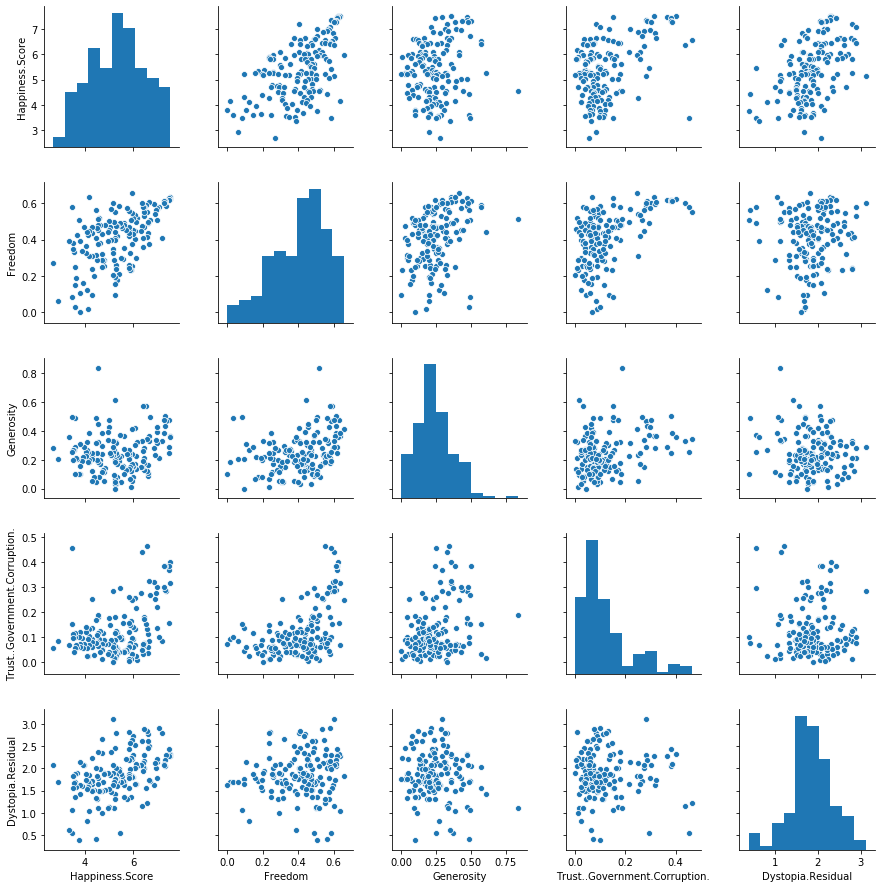

In [54]:
Z =df_2017.drop(["Family","Health..Life.Expectancy.",'Economy..GDP.per.Capita.', 'Country','Happiness.Rank','Whisker.high','Whisker.low','Global Average Above or Below'],axis=1)
sns.pairplot(Z)
Z
plt.savefig("pairplot_least_imp.png",dpi=200,bbox_inches = 'tight')

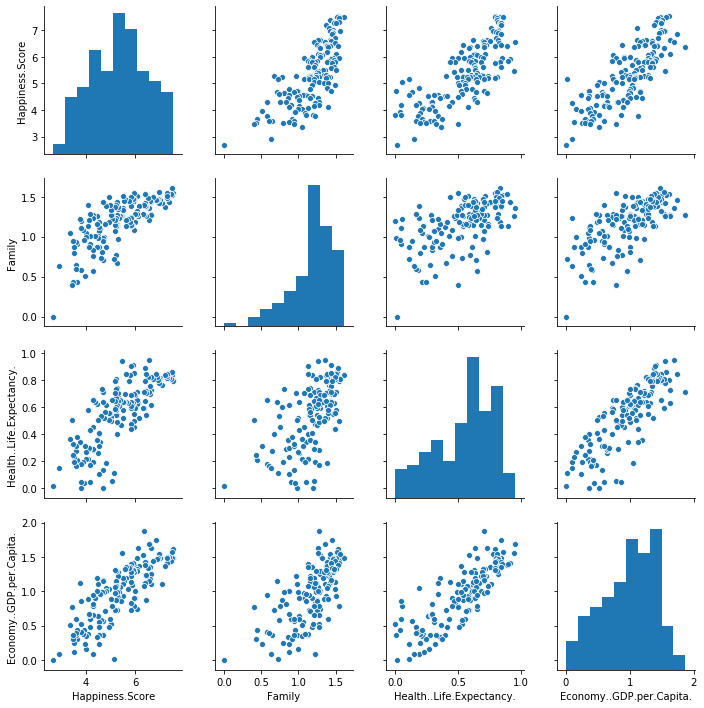

In [55]:
Z =df_2017[['Happiness.Score',"Family","Health..Life.Expectancy.",'Economy..GDP.per.Capita.' ]]
sns.pairplot(Z)
Z
plt.savefig("pairplot_most_imp.png", dpi = 200,bbox_inches = 'tight')

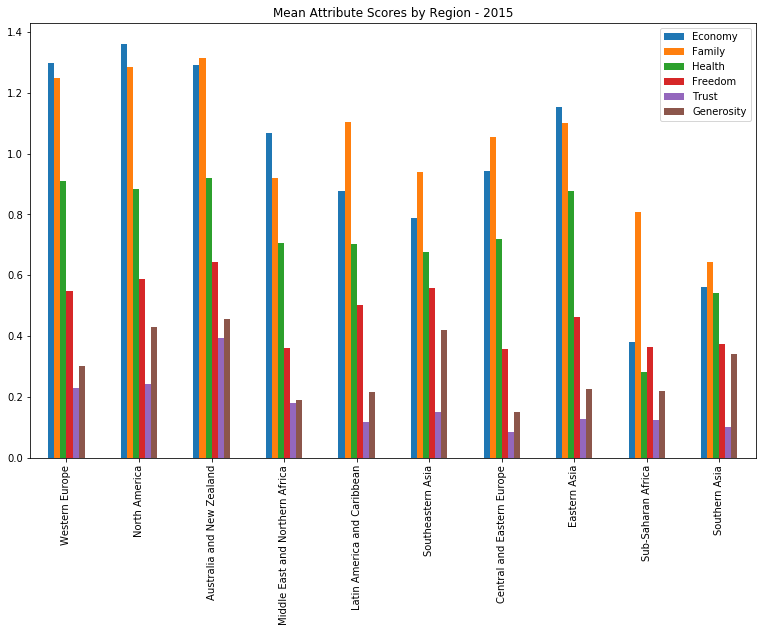

In [56]:
def meanAttributes2015(location):
    happiness_2015 = pd.read_csv("2015.csv")
    happiness_2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']
    columns_2015 = ['Standard Error']
    dropped_2015 = happiness_2015.drop(columns_2015, axis=1)
    
    temp = dropped_2015[dropped_2015['Region'] == location]
    
    columns = ['Happiness_Score','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
    df = pd.DataFrame(index=[location], columns=columns)
    for col in columns:
        df[col] = temp[col].mean()
    
    return df
        
WestEU = meanAttributes2015('Western Europe')   
NA = meanAttributes2015('North America')
AusNZ = meanAttributes2015('Australia and New Zealand')
AfricaMidEast = meanAttributes2015('Middle East and Northern Africa')
LA = meanAttributes2015('Latin America and Caribbean')
SEAsia = meanAttributes2015('Southeastern Asia')
CEAEU = meanAttributes2015('Central and Eastern Europe')
EEA = meanAttributes2015('Eastern Asia')
SSAfrica= meanAttributes2015('Sub-Saharan Africa')
SA = meanAttributes2015('Southern Asia')

av = pd.concat([WestEU,NA,AusNZ,AfricaMidEast, LA, SEAsia, CEAEU, EEA, SSAfrica, SA])
av[['Economy','Family','Health','Freedom','Trust', 'Generosity']].plot(kind='bar', figsize=(13,8), title= "Mean Attribute Scores by Region - 2015")
plt.savefig("meanAttributes2015.png",bbox_inches = 'tight')

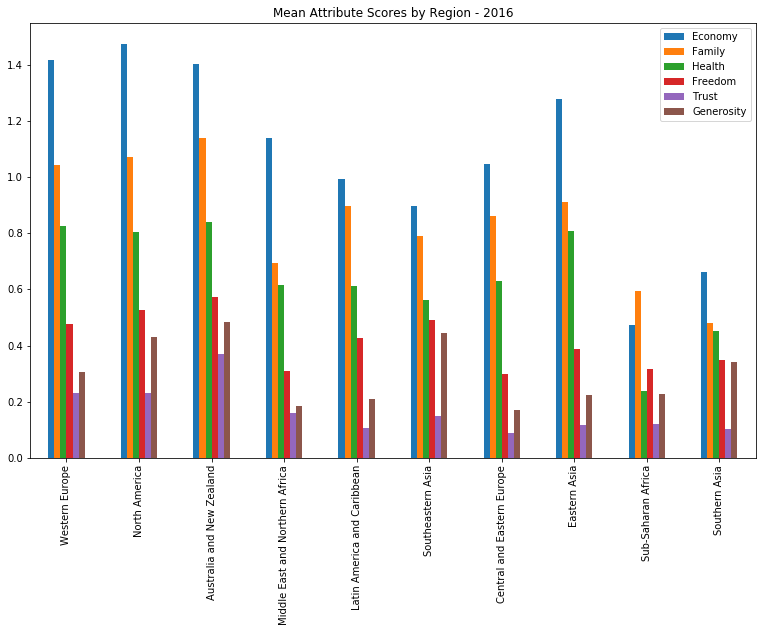

In [57]:
def meanAttributes2016(location):
    happiness_2016 = pd.read_csv("2016.csv")
    happiness_2016.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score','Lower Confidence Interval','Upper Confidence Interval', 'Economy', 'Family','Health', 'Freedom', 'Trust','Generosity', 'Dystopia_Residual']
    #columns_2016 = [['Lower Confidence Interval','Upper Confidence Interval']]
    dropped_2016 = happiness_2016.drop(['Lower Confidence Interval','Upper Confidence Interval'], axis=1)
    
    temp = dropped_2016[dropped_2016['Region'] == location]
    
    columns = ['Happiness_Score','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
    df = pd.DataFrame(index=[location], columns=columns)
    for col in columns:
        df[col] = temp[col].mean()
    
    return df
        
WestEU = meanAttributes2016('Western Europe')   
NA = meanAttributes2016('North America')
AusNZ = meanAttributes2016('Australia and New Zealand')
AfricaMidEast = meanAttributes2016('Middle East and Northern Africa')
LA = meanAttributes2016('Latin America and Caribbean')
SEAsia = meanAttributes2016('Southeastern Asia')
CEAEU = meanAttributes2016('Central and Eastern Europe')
EEA = meanAttributes2016('Eastern Asia')
SSAfrica= meanAttributes2016('Sub-Saharan Africa')
SA = meanAttributes2016('Southern Asia')

av = pd.concat([WestEU,NA,AusNZ,AfricaMidEast, LA, SEAsia, CEAEU, EEA, SSAfrica, SA])
av[['Economy','Family','Health','Freedom','Trust', 'Generosity']].plot(kind='bar', figsize=(13,8), title= "Mean Attribute Scores by Region - 2016")
plt.savefig("meanAttributes2016.png",bbox_inches = 'tight',dpi=200)

In [58]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Global Average Above or Below,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1.0,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1.0,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1.0,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,1.0,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.0,Western Europe


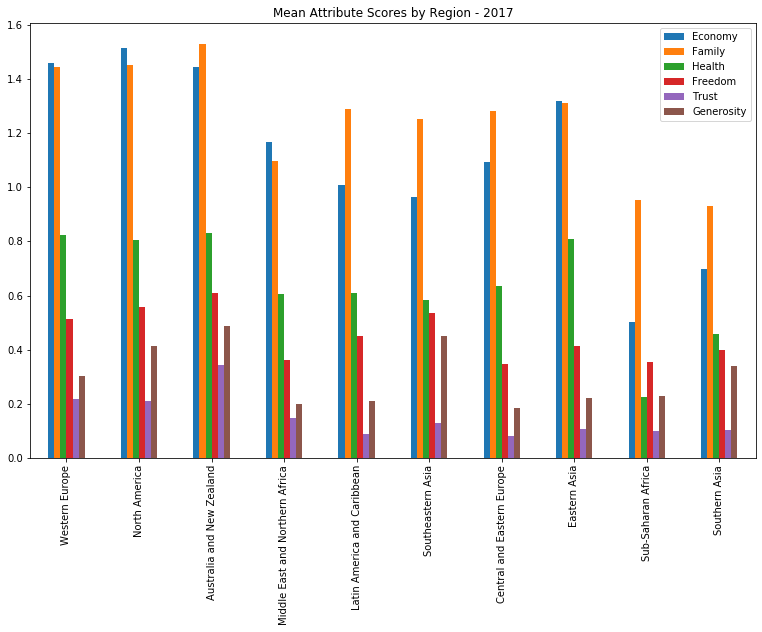

In [59]:
def meanAttributes2017(location):
    happiness_2017 = df_2017
    happiness_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Whisker.High','Whisker.Low', 'Economy', 'Family','Health', 'Freedom', 'Generosity','Trust', 'Dystopia_Residual','Global Class', 'Region']
    #columns_2016 = [['Lower Confidence Interval','Upper Confidence Interval']]
    dropped_2017 = happiness_2017.drop(['Whisker.High','Whisker.Low','Global Class'], axis=1)
    
    temp = dropped_2017[dropped_2017['Region'] == location]
    
    columns = ['Happiness_Score','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
    df = pd.DataFrame(index=[location], columns=columns)
    for col in columns:
        df[col] = temp[col].mean()
    
    return df
        
WestEU = meanAttributes2017('Western Europe')   
NA = meanAttributes2017('North America')
AusNZ = meanAttributes2017('Australia and New Zealand')
AfricaMidEast = meanAttributes2017('Middle East and Northern Africa')
LA = meanAttributes2017('Latin America and Caribbean')
SEAsia = meanAttributes2017('Southeastern Asia')
CEAEU = meanAttributes2017('Central and Eastern Europe')
EEA = meanAttributes2017('Eastern Asia')
SSAfrica= meanAttributes2017('Sub-Saharan Africa')
SA = meanAttributes2017('Southern Asia')

av = pd.concat([WestEU,NA,AusNZ,AfricaMidEast, LA, SEAsia, CEAEU, EEA, SSAfrica, SA])
av[['Economy','Family','Health','Freedom','Trust', 'Generosity']].plot(kind='bar', figsize=(13,8), title= "Mean Attribute Scores by Region - 2017")
plt.savefig("meanAttributes2017.png",bbox_inches = 'tight',dpi=200)

In [60]:
from sklearn.model_selection import KFold
happiness_2017 =  pd.read_csv("2017.csv")
columns_2017 = ['Whisker.high','Whisker.low' ]
dropped_2017 = happiness_2017.drop(columns_2017, axis=1)
dropped_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']
columns = ['Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']
dropped_2017 = dropped_2017.drop(columns, axis=1)
dropped_2017

x = dropped_2017[['Economy', 'Family', 'Health']]
y = dropped_2017[['Happiness_Score']]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
clf = svm.SVR(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7945077444718505